<a href="datacamp.com/workspacecompetition" target="_blank">![banner](banner.png)</a>

# Loan Data

Ready to put your coding skills to the test? Join us for our Workspace Competition.  
For more information, visit [datacamp.com/workspacecompetition](https://datacamp.com/workspacecompetition) 

## Context
This dataset ([source](https://www.kaggle.com/itssuru/loan-data)) consists of data from almost 10,000 borrowers that took loans - with some paid back and others still in progress. It was extracted from lendingclub.com which is an organization that connects borrowers with investors. We've included a few suggested questions at the end of this template to help you get started.

In [1]:
# Load packages
import numpy as np 
import pandas as pd 

## Load your data

In [2]:
# Load data from the csv file
df = pd.read_csv('loan_data.csv', index_col=None)

# Change the dots in the column names to underscores
df.columns = [c.replace(".", "_") for c in df.columns]
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head()

Number of rows/records: 9578
Number of columns/variables: 14


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])
for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
variables.head()

,Variable,Number of unique values,Values
0,credit_policy,2,"[1, 0]"
1,purpose,7,"[debt_consolidation, credit_card, all_other, h..."
2,int_rate,249,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078..."
3,installment,4788,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13..."
4,log_annual_inc,1987,"[11.35040654, 11.08214255, 10.37349118, 11.299..."


In [4]:
from pandas import option_context
var_dict = pd.read_csv('variable_explanation.csv', index_col=0)

with option_context('display.max_colwidth', 400):
    display(var_dict)

,Explanation
Variable,
credit_policy,1 if the customer meets the credit underwriting criteria; 0 otherwise.
purpose,The purpose of the loan.
int_rate,The interest rate of the loan (more risky borrowers are assigned higher interest rates).
installment,The monthly installments owed by the borrower if the loan is funded.
log_annual_inc,The natural log of the self-reported annual income of the borrower.
dti,The debt-to-income ratio of the borrower (amount of debt divided by annual income).
fico,The FICO credit score of the borrower.
days_with_cr_line,The number of days the borrower has had a credit line.
revol_bal,The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).


## Understand your variables

In [5]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
# Join with the variables dataframe
var_dict = pd.read_csv('variable_explanation.csv', index_col=0)
variables.set_index('Variable').join(var_dict)

,Number of unique values,Values,Explanation
Variable,,,
credit_policy,2,"[1, 0]",1 if the customer meets the credit underwritin...
purpose,7,"[debt_consolidation, credit_card, all_other, h...",The purpose of the loan.
int_rate,249,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078...",The interest rate of the loan (more risky borr...
installment,4788,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13...",The monthly installments owed by the borrower ...
log_annual_inc,1987,"[11.35040654, 11.08214255, 10.37349118, 11.299...",The natural log of the self-reported annual in...
dti,2529,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ...",The debt-to-income ratio of the borrower (amou...
fico,44,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ...",The FICO credit score of the borrower.
days_with_cr_line,2687,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406...",The number of days the borrower has had a cred...
revol_bal,7869,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,...",The borrower's revolving balance (amount unpai...


In [45]:
df.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'fully_paid'],
      dtype='object')

Now you can start to explore this dataset with the chance to win incredible prices! Can't think of where to start? Try your hand at these suggestions:

- Extract useful insights and visualize them in the most interesting way possible.
- Find out how long it takes for users to pay back their loan.
- Build a model that can predict the probability a user will be able to pay back their loan within a certain period.
- Find out what kind of people take a loan for what purposes.

# My solution:
###      1. Visualising data
###      2. Feature selection
###      3. Correlation and PCA Analysis
###      4. Modelling the loan payoff
###      5. Predicting the loan payoff


In [7]:
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df.days_with_cr_line = df.days_with_cr_line.astype(int).round()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   int64  
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 1.0+ MB


In [9]:
df['not_fully_paid'].value_counts()  # how many paid

0    8045
1    1533
Name: not_fully_paid, dtype: int64

In [8]:
df['not_fully_paid'].replace({0:1,1:0},inplace=True)    # swap values
df.rename(columns={'not_fully_paid':'fully_paid'},inplace=True)
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639,28854,52.1,0,0,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760,33623,76.7,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710,3511,25.6,1,0,0,1
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699,33667,73.2,1,0,0,1
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066,4740,39.5,0,1,0,1


In [12]:
df['fully_paid'].value_counts()

1    8045
0    1533
Name: fully_paid, dtype: int64

# 1. Visualising data 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [11]:
s_sort= df.groupby('purpose')['fully_paid'].value_counts()
df_sort = s_sort.to_frame()

df_sort.rename(columns={'fully_paid':'count_purpose'},inplace=True)

df_sort.reset_index(inplace=True)
df_sort.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort.sort_values(by=['count_purpose'], ascending=False, inplace=True)
df_sort

,purpose,loan_status,count_purpose
4,debt_consolidation,Fully paid,3354
0,all_other,Fully paid,1944
2,credit_card,Fully paid,1116
5,debt_consolidation,Not fully paid,603
8,home_improvement,Fully paid,522
12,small_business,Fully paid,447
10,major_purchase,Fully paid,388
1,all_other,Not fully paid,387
6,educational,Fully paid,274
13,small_business,Not fully paid,172


 ### Does a loan purpose affect its repayment?
 
Lets look at the loan purposes. Most people take loans for debt consolidation, credit card debt or other purposes.
Meanwhile, paid and not paid loans do not seem to differ much by purpose i.e. a purpose does not seem to be a useful prediction feature.

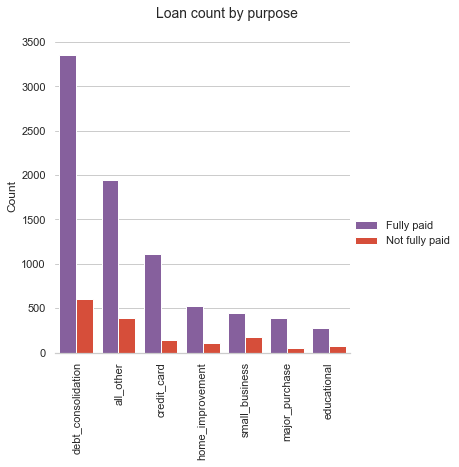

In [14]:
# Lets plot the loan purpose data.
plot = sns.catplot(data=df_sort, kind="bar",x="purpose", y="count_purpose", palette=['#8856a7', '#f03b20'], hue="loan_status" )

plot.legend.set_title("")
plot.set_axis_labels("", "Count")
            
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)#.set(title='Title of Plot')

plot.fig.suptitle('Loan count by purpose', y=1.05, fontsize=14)

plot.despine(left=True)

## Exploring features by visualisation

Features such as 'days_with_cr_line', 'log_annual_inc', 'installment', 'dti', 'revol_util'   seem to differ between the fully paid and not paid loans, as we can conclude by comparing of the shapes and values of frequency distribution for each feature.

In [15]:
s_sort_i= df.groupby('int_rate')['fully_paid'].value_counts()
df_sort_i = s_sort_i.to_frame()

df_sort_i.rename(columns={'fully_paid':'count_intrate'},inplace=True)

df_sort_i.reset_index(inplace=True)
df_sort_i.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_i['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_i.sort_values(by=['count_intrate'], ascending=False, inplace=True)
df_sort_i

# 'int_rate','days_with_cr_line','log_annual_inc','fico'

,int_rate,loan_status,count_intrate
171,0.1253,Fully paid,302
38,0.0894,Fully paid,275
141,0.1183,Fully paid,218
24,0.0800,Fully paid,188
56,0.0963,Fully paid,186
...,...,...,...
314,0.1551,Not fully paid,1
316,0.1557,Not fully paid,1
413,0.1793,Not fully paid,1
68,0.1001,Not fully paid,1


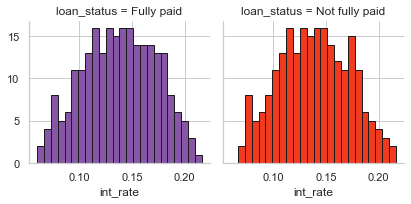

In [16]:
# similar
bins = np.linspace(df_sort_i.int_rate.min(), df_sort_i.int_rate.max(), 25)

g = sns.FacetGrid(df_sort_i, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'int_rate', bins=bins, ec="k")


plt.show()

In [147]:
print('How many days on average the users had a credit line: {:.0f}'.format(df.days_with_cr_line.mean()))
print('How many days most users had a credit line: {:.0f}'.format(df.days_with_cr_line.mode().round()[0]))
print('The users had a credit line from {:.0f} to {:.0f} days'.format(df.days_with_cr_line.min().round(), df.days_with_cr_line.max().round()))

How many days on average the users had a credit line: 4561
How many days most users had a credit line: 3660
The users had a credit line from 178 to 17639 days


In [77]:
df.days_with_cr_line.mode().round()[0]

3660

In [98]:
s_sort_d= df.groupby('days_with_cr_line')['fully_paid'].value_counts()
df_sort_d = s_sort_d.to_frame()

df_sort_d.rename(columns={'fully_paid':'count_days'},inplace=True)

df_sort_d.reset_index(inplace=True)
df_sort_d.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_d['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_d.sort_values(by=['count_days'], ascending=False, inplace=True)
#df_sort_d

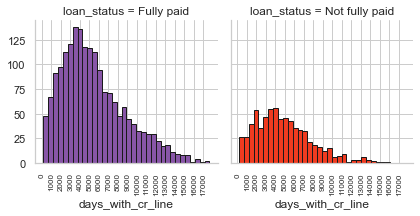

In [99]:
# more peaked and left-skewed for paid loans.
bins = np.linspace(df_sort_d.days_with_cr_line.min(), df_sort_d.days_with_cr_line.max(), 35)

g = sns.FacetGrid(df_sort_d, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'days_with_cr_line', bins=bins, ec="k")

g.set(xticks=np.arange(0,17500,1000))
g.set_xticklabels(np.arange(0,17500,1000), fontsize=8, rotation=90)
plt.show()

In [52]:
s_sort_in= df.groupby('log_annual_inc')['fully_paid'].value_counts()
df_sort_in = s_sort_in.to_frame()

df_sort_in.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_in.reset_index(inplace=True)
df_sort_in.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_in['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_in.sort_values(by=['count_in'], ascending=False, inplace=True)
#df_sort_in

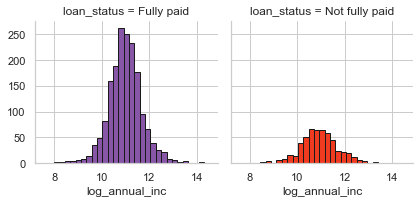

In [28]:
# more peaked for paid loans
bins = np.linspace(df_sort_in.log_annual_inc.min(), df_sort_in.log_annual_inc.max(), 32)

g = sns.FacetGrid(df_sort_in, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'log_annual_inc', bins=bins, ec="k")

plt.show()

In [19]:
s_sort_dti= df.groupby('dti')['fully_paid'].value_counts()
df_sort_dti = s_sort_dti.to_frame()

df_sort_dti.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_dti.reset_index(inplace=True)
df_sort_dti.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_dti['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_dti.sort_values(by=['count_in'], ascending=False, inplace=True)
#df_sort_in

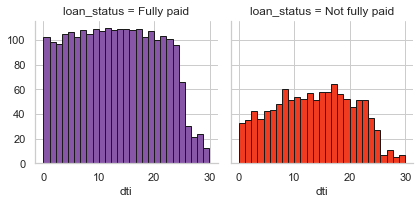

In [21]:
# more normal for not paid loans.
bins = np.linspace(df_sort_dti.dti.min(), df_sort_dti.dti.max(), 28)

g = sns.FacetGrid(df_sort_dti, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'dti', bins=bins, ec="k")

plt.show()

In [53]:
s_sort_fi= df.groupby('fico')['fully_paid'].value_counts()
df_sort_fi = s_sort_fi.to_frame()

df_sort_fi.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_fi.reset_index(inplace=True)
df_sort_fi.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_fi['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_fi.sort_values(by=['count_in'], ascending=False, inplace=True)

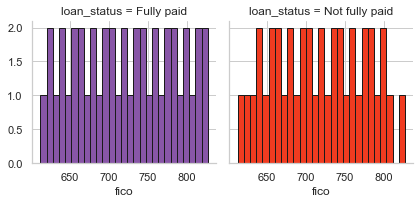

In [54]:
# seems similar
bins = np.linspace(df_sort_fi.fico.min(), df_sort_fi.fico.max(), 28)

g = sns.FacetGrid(df_sort_fi, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'fico', bins=bins, ec="k")

plt.show()

In [23]:
s_sort_ins= df.groupby('installment')['fully_paid'].value_counts()
df_sort_ins = s_sort_ins.to_frame()

df_sort_ins.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_ins.reset_index(inplace=True)
df_sort_ins.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_ins['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_ins.sort_values(by=['count_in'], ascending=False, inplace=True)

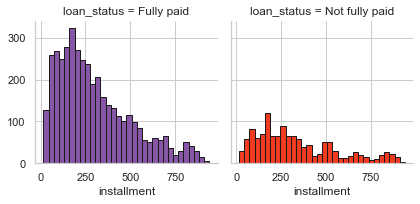

In [26]:
# more left skewed for paid loans
bins = np.linspace(df_sort_ins.installment.min(), df_sort_ins.installment.max(), 33)

g = sns.FacetGrid(df_sort_ins, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'installment', bins=bins, ec="k")

plt.show()

In [93]:
s_sort_revb= df.groupby('revol_bal')['fully_paid'].value_counts()
df_sort_revb = s_sort_revb.to_frame()
df_sort_revb.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_revb.reset_index(inplace=True)
df_sort_revb.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_revb['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)
df_sort_revb1 = df_sort_revb.loc[df_sort_revb['revol_bal'] >=50000]
df_sort_revb1.sort_values(by=['count_in'], ascending=False, inplace=True)
df_sort_revb1

,revol_bal,loan_status,count_in
8182,275925,Fully paid,2
8099,150786,Fully paid,2
8143,205347,Fully paid,2
8000,101022,Fully paid,1
7994,95564,Not fully paid,1
...,...,...,...
7800,63861,Not fully paid,1
7801,64266,Fully paid,1
7802,64362,Fully paid,1
7803,64394,Fully paid,1


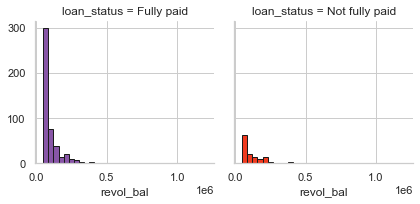

In [94]:
# similar
bins = np.linspace(df_sort_revb1.revol_bal.min(), df_sort_revb1.revol_bal.max(), 33)

g = sns.FacetGrid(df_sort_revb1, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'])
g.map(plt.hist, 'revol_bal', bins=bins, ec="k")

plt.show()

In [65]:
df_sort_revb

,revol_bal,loan_status,count_in
0,0,Fully paid,262
1,0,Not fully paid,59
186,255,Fully paid,10
426,682,Fully paid,9
237,346,Fully paid,8
...,...,...,...
3037,6641,Not fully paid,1
3036,6639,Fully paid,1
3035,6638,Fully paid,1
3034,6638,Not fully paid,1


In [40]:
s_sort_revu= df.groupby('revol_util')['fully_paid'].value_counts()
df_sort_revu = s_sort_revu.to_frame()

df_sort_revu.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_revu.reset_index(inplace=True)
df_sort_revu.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_revu['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_revu.sort_values(by=['count_in'], ascending=False, inplace=True)

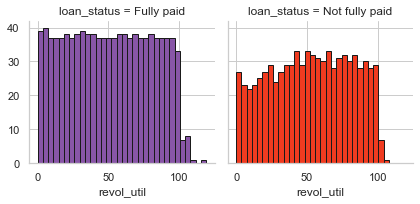

In [42]:
# more even for paid loans
bins = np.linspace(df_sort_revu.revol_util.min(), df_sort_revu.revol_util.max(), 33)

g = sns.FacetGrid(df_sort_revu, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'])
g.map(plt.hist, 'revol_util', bins=bins, ec="k")

plt.show()

In [96]:
s_sort_inq= df.groupby('inq_last_6mths')['fully_paid'].value_counts()
df_sort_inq = s_sort_inq.to_frame()

df_sort_inq.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_inq.reset_index(inplace=True)
df_sort_inq.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_inq['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_inq.sort_values(by=['count_in'], ascending=False, inplace=True)

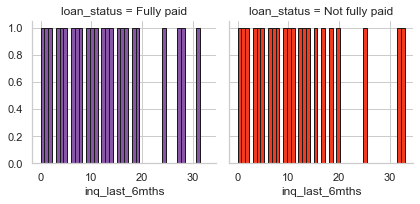

In [97]:
bins = np.linspace(df_sort_inq.inq_last_6mths.min(), df_sort_inq.inq_last_6mths.max(), 45)

g = sns.FacetGrid(df_sort_inq, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'])
g.map(plt.hist, 'inq_last_6mths', bins=bins, ec="k")

plt.show()

In [48]:
s_sort_dlq= df.groupby('delinq_2yrs')['fully_paid'].value_counts()
df_sort_dlq = s_sort_dlq.to_frame()

df_sort_dlq.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_dlq.reset_index(inplace=True)
df_sort_dlq.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_dlq['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_dlq.sort_values(by=['count_in'], ascending=False, inplace=True)

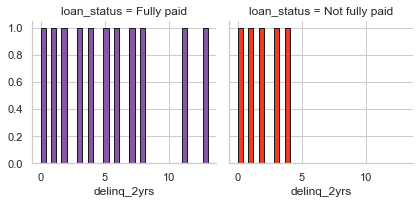

In [49]:
# similar
bins = np.linspace(df_sort_dlq.delinq_2yrs.min(), df_sort_dlq.delinq_2yrs.max(), 33)

g = sns.FacetGrid(df_sort_dlq, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'])
g.map(plt.hist, 'delinq_2yrs', bins=bins, ec="k")

plt.show()

In [50]:
s_sort_rec= df.groupby('pub_rec')['fully_paid'].value_counts()
df_sort_rec = s_sort_rec.to_frame()

df_sort_rec.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_rec.reset_index(inplace=True)
df_sort_rec.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_rec['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_rec.sort_values(by=['count_in'], ascending=False, inplace=True)

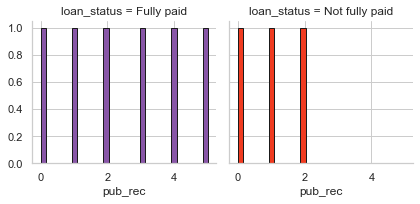

In [52]:
# similar
bins = np.linspace(df_sort_rec.pub_rec.min(), df_sort_rec.pub_rec.max(), 33)

g = sns.FacetGrid(df_sort_rec, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'])
g.map(plt.hist, 'pub_rec', bins=bins, ec="k")

plt.show()

# 2. Feature selection

For the first feature set, I select 'credit_policy','installment', 'log_annual_inc', 'dti', 'days_with_cr_line','revol_util' from the visualisations above. For the second feature set, feature selection is performed with the SelectKBest() method and ANOVA-f measure from the scikit-learn library.

In [12]:
# from the visualisations above plus 1 categorical feature, credit_policy

all_features0 = df[['credit_policy','installment', 'log_annual_inc', 'dti', 'days_with_cr_line','revol_util']]

In [9]:
# KBest

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest,f_classif


In [31]:
features = df[['int_rate', 'installment', 'log_annual_inc','dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util', \
       'inq_last_6mths','pub_rec']].values
features.shape

(9578, 10)

In [32]:
Y = df['fully_paid'].values


In [33]:
fs = SelectKBest(score_func=f_classif, k=4)  # choose 4 features
fit_selected = fs.fit(features, Y)
fit_selected

SelectKBest(k=4)

In [34]:
print(fit_selected.scores_)

[250.14120228  23.95686725  10.71979245  13.38566487 219.41737141
   8.19261323  27.69341779  64.96469182 218.77495366  22.7037686 ]


In [25]:
print(f_selected[0:6,:])

[[1.000e+00 1.189e-01 7.370e+02 5.210e+01 0.000e+00]
 [1.000e+00 1.071e-01 7.070e+02 7.670e+01 0.000e+00]
 [1.000e+00 1.357e-01 6.820e+02 2.560e+01 1.000e+00]
 [1.000e+00 1.008e-01 7.120e+02 7.320e+01 1.000e+00]
 [1.000e+00 1.426e-01 6.670e+02 3.950e+01 0.000e+00]
 [1.000e+00 7.880e-02 7.270e+02 5.100e+01 0.000e+00]]


In [ ]:
# Best 5 features are 'int_rate', 'fico', 'revol_util', 'inq_last_6mths'.

In [43]:
all_features1 = df[['credit_policy','int_rate', 'fico', 'revol_util', 'inq_last_6mths']]

In [44]:
# Normalizing data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled0 = scaler.fit_transform(all_features0)
all_features_scaled0

all_features_scaled1 = scaler.fit_transform(all_features1)
all_features_scaled1

array([[ 0.49222226, -0.13931753,  0.68882488,  0.18270369, -0.71698894],
       [ 0.49222226, -0.57886837, -0.10130263,  1.03060231, -0.71698894],
       [ 0.49222226,  0.48648368, -0.75974223, -0.73068304, -0.26247044],
       ...,
       [-2.03160257, -0.57886837, -0.62805431,  1.24430034,  2.91915909],
       [-2.03160257,  1.39166043, -0.49636639, -1.50275334,  1.55560358],
       [-2.03160257,  0.61685894,  0.55713697,  0.35159406,  2.01012208]])

# 3. Correlation and PCA analysis

In [151]:
df.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'fully_paid'],
      dtype='object')

In [231]:
numeric_cols = ['int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths','pub_rec']
df_num = df[numeric_cols]
df_corr = df_num.corr()
df_corr

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,pub_rec
int_rate,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124023,0.092527,0.464837,0.202780,0.098162
installment,0.276140,1.000000,0.448102,0.050202,0.086039,0.183305,0.233625,0.081356,-0.010419,-0.032760
log_annual_inc,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336895,0.372140,0.054881,0.029171,0.016506
dti,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,0.006209
fico,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263879,-0.015553,-0.541289,-0.185293,-0.147592
days_with_cr_line,-0.124023,0.183305,0.336895,0.060101,0.263879,1.000000,0.229346,-0.024240,-0.041737,0.071829
revol_bal,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229346,1.000000,0.203779,0.022394,-0.031010
revol_util,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024240,0.203779,1.000000,-0.013880,0.066717
inq_last_6mths,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041737,0.022394,-0.013880,1.000000,0.072673
pub_rec,0.098162,-0.032760,0.016506,0.006209,-0.147592,0.071829,-0.031010,0.066717,0.072673,1.000000


In [235]:
# int_rate/fico, revol_util/fico, int_rate/revol_util, log_annual_inc/installment, log_annual_inc/revol_bal seem to be significantly correlated.
df_big_corr = df_corr.apply(lambda x: [y if abs(y) >= 0.35 else 'less' for y in x])
df_big_corr

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,pub_rec
int_rate,1.0,less,less,less,-0.714821,less,less,0.464837,less,less
installment,less,1.0,0.448102,less,less,less,less,less,less,less
log_annual_inc,less,0.448102,1.0,less,less,less,0.37214,less,less,less
dti,less,less,less,1.0,less,less,less,less,less,less
fico,-0.714821,less,less,less,1.0,less,less,-0.541289,less,less
days_with_cr_line,less,less,less,less,less,1.0,less,less,less,less
revol_bal,less,less,0.37214,less,less,less,1.0,less,less,less
revol_util,0.464837,less,less,less,-0.541289,less,less,1.0,less,less
inq_last_6mths,less,less,less,less,less,less,less,less,1.0,less
pub_rec,less,less,less,less,less,less,less,less,less,1.0


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'int_rate'),
  Text(1.5, 0, 'installment'),
  Text(2.5, 0, 'log_annual_inc'),
  Text(3.5, 0, 'dti'),
  Text(4.5, 0, 'fico'),
  Text(5.5, 0, 'days_with_cr_line'),
  Text(6.5, 0, 'revol_bal'),
  Text(7.5, 0, 'revol_util'),
  Text(8.5, 0, 'inq_last_6mths'),
  Text(9.5, 0, 'pub_rec')])

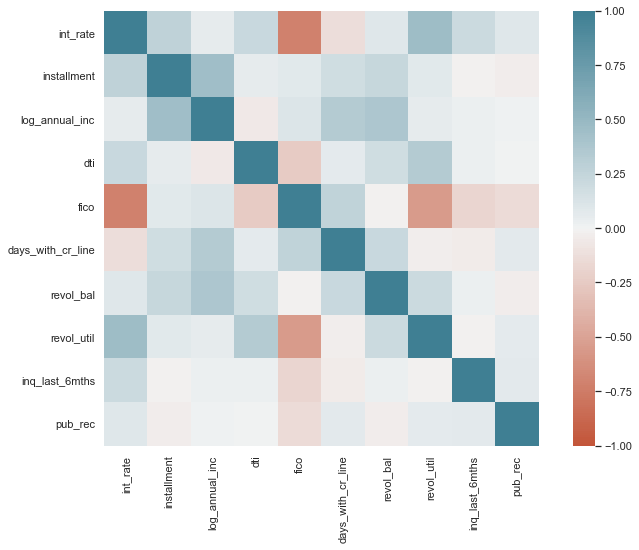

In [233]:
fig,ax = plt.subplots (figsize =(12,8))
sns.heatmap(df_corr, square=True, vmin =-1, vmax=1, cmap=sns.diverging_palette(20,220,n=200))
plt.xticks(rotation=90)

### Principle Component Analysis

In [53]:
all_features2 = df[['credit_policy' ,'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths','pub_rec']]
all_features2.shape


(9578, 11)

In [17]:
# features excluding 'fico' as a feature due to 2 highly correlated pairs, fico/int_rate and fico/revol_util

all_features3 = df[['credit_policy' ,'int_rate', 'installment', 'log_annual_inc',
       'dti', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths','pub_rec']]
all_features3.shape

(9578, 10)

In [54]:
# Normalizing data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled2 = scaler.fit_transform(all_features2)
all_features_scaled2

all_features_scaled3 = scaler.fit_transform(all_features3)
all_features_scaled3

array([[ 0.49222226, -0.13931753,  2.46309947, ...,  0.18270369,
        -0.71698894, -0.23700318],
       [ 0.49222226, -0.57886837, -0.43885443, ...,  1.03060231,
        -0.71698894, -0.23700318],
       [ 0.49222226,  0.48648368,  0.23070836, ..., -0.73068304,
        -0.26247044, -0.23700318],
       ...,
       [-2.03160257, -0.57886837, -1.06867038, ...,  1.24430034,
         2.91915909, -0.23700318],
       [-2.03160257,  1.39166043,  0.1569135 , ..., -1.50275334,
         1.55560358, -0.23700318],
       [-2.03160257,  0.61685894,  2.58060136, ...,  0.35159406,
         2.01012208, -0.23700318]])

In [20]:
y = df['fully_paid']
y.shape

(9578,)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_features_scaled2, y, test_size = 0.2, random_state=18)

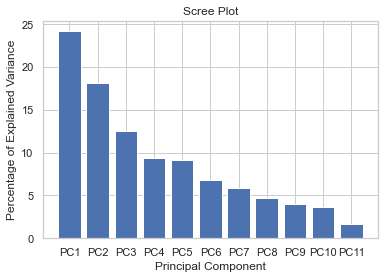

In [84]:
# Choosing the number of PCA components: it looks like each of the first 3 PCA components explain over 10% of varience.
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
import matplotlib.pyplot as plt    
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

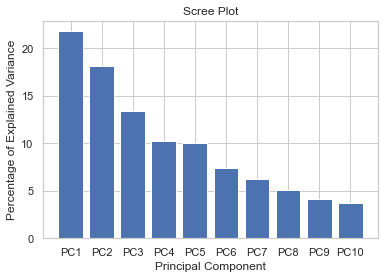

In [25]:
# Without fica. the first 5 PCA components are most pronounced.

X_train1, X_test1, y_train1, y_test1 = train_test_split(all_features_scaled3, y, test_size = 0.2, random_state=18)


from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train1)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
import matplotlib.pyplot as plt    
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# 4. Modelling the loan payoff.

I use all features, the features selected from visualisations, and the features selected by KBest. Then I use the features from the PCA analysis and the features including a new designed feature. The Neural Networks model uses all features. I choose the model with the highest accuracy score for prediction.


In [15]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### All features

#### Logistic regression

In [99]:
lr = LogisticRegression(solver = 'sag')
lr.fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.6f}'
     .format(lr.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.6f}'
     .format(lr.score(X_test, y_test)))

Accuracy of RF classifier on training set: 0.841425
Accuracy of RF classifier on test set: 0.831420


#### Decision Tree and Random Forest models

In [100]:
dtc = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 6, random_state = 0).fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.5f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.5f}'
     .format(dtc.score(X_test, y_test)))

# max_depth=4, test acc = 83.3%

Accuracy of DT classifier on training set: 0.84260
Accuracy of DT classifier on test set: 0.83351


In [65]:
rf = RandomForestClassifier()
grid_values = {'max_depth': [3,4,6],'n_estimators': [10,12,14]}
grid_rf_auc = GridSearchCV( rf, param_grid = grid_values, cv=3, scoring='roc_auc')
grid_rf_auc.fit(X_train, y_train)
print('Grid best parameter (max. AUC): ', grid_rf_auc.best_params_)

rfc = RandomForestClassifier(n_estimators = 14, max_depth=4, max_features = None, random_state = 4).fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.6f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.6f}'
     .format(rfc.score(X_test, y_test)))

Grid best parameter (max. AUC):  {'max_depth': 4, 'n_estimators': 14}
Accuracy of RF classifier on training set: 0.842078
Accuracy of RF classifier on test set: 0.835073


In [ ]:
# test acc = 83.51%

#### Gradient Boosting

In [32]:
gr = GradientBoostingClassifier()
grid_values = {'learning_rate': [0.008,0.009],'n_estimators': [300,320]}
grid_grc = GridSearchCV( gr, param_grid = grid_values, cv=5, scoring='roc_auc')
grid_grc.fit(X_train, y_train)

print('Model best parameter (max. AUC): ', grid_grc.best_params_)
print('Model score (AUC): ', grid_grc.best_score_)
    
grc= GradientBoostingClassifier(learning_rate = 0.009, max_depth = 3, n_estimators=320).fit(X_train, y_train)
print('Accuracy of GB classifier on training set: {:.5f}'
     .format(grc.score(X_train, y_train)))
print('Accuracy of GB classifier on test set: {:.5f}'
     .format(grc.score(X_test, y_test)))

Model best parameter (max. AUC):  {'learning_rate': 0.009, 'n_estimators': 320}
Model score (AUC):  0.6574143473279499
Accuracy of DT classifier on training set: 0.84273
Accuracy of DT classifier on test set: 0.83559


In [ ]:
# acc score 83.56%

In [ ]:
0.83507

#### Support Vector Classifier

In [22]:
svm_r = SVC()
grid_values = [{'C':[1,10,100],'gamma':[0.001,0.003],'kernel': ['rbf']}]

optimal_params = GridSearchCV(svm_r,grid_values,cv=5, verbose=0)

optimal_params.fit(X_train, y_train)
optimal_params.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [24]:
svm_model = SVC(gamma=0.001, C = 1, kernel = 'rbf').fit(X_train, y_train)

print('Accuracy of SV classifier on training set: {:.5f}'
     .format(svm_model.score(X_train, y_train)))
print('Accuracy of SV classifier on test set: {:.5f}'
     .format(svm_model.score(X_test, y_test)))

Accuracy of SV classifier on training set: 0.84116
Accuracy of SV classifier on test set: 0.83507


In [26]:
svm_l = SVC()
grid_values = [{'C':[1,10],'gamma':[0.001,0.005],'kernel': ['linear']}]

optimal_params = GridSearchCV(svm_l,grid_values,cv=5, verbose=0)

optimal_params.fit(X_train, y_train)
optimal_params.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

In [28]:
svm_model = SVC(gamma=0.001, C = 1, kernel = 'linear').fit(X_train, y_train)

print('Accuracy of SV classifier on training set: {:.5f}'
     .format(svm_model.score(X_train, y_train)))
print('Accuracy of SV classifier on test set: {:.5f}'
     .format(svm_model.score(X_test, y_test)))

Accuracy of SV classifier on training set: 0.84116
Accuracy of SV classifier on test set: 0.83507


#### Logistic binary classification

In [98]:
lr = LogisticRegression(solver = 'sag')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.831419624217119

#### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
k = 15

knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

print('Accuracy of KN classifier on training set: {:.5f}'
     .format(knn_model.score(X_train, y_train)))
print('Accuracy of KN classifier on test set: {:.5f}'
     .format(knn_model.score(X_test, y_test)))

Accuracy of KN classifier on training set: 0.84312
Accuracy of KN classifier on test set: 0.83507


In [22]:
# Best k
Ks=18
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.75626305, 0.67849687, 0.79645094, 0.76356994, 0.81889353,
       0.80584551, 0.82515658, 0.815762  , 0.82985386, 0.8256785 ,
       0.83194154, 0.82985386, 0.83402923, 0.83455115, 0.83507307,
       0.83507307, 0.83507307])

 ### 6 features - 'credit_policy','installment', 'log_annual_inc', 'dti', 'days_with_cr_line','revol_util'

In [58]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(all_features_scaled0, y, test_size = 0.2, random_state=18)

#### Random Forest

In [86]:
rf = RandomForestClassifier()
grid_values = {'max_depth': [3,4,6],'n_estimators': [14,16,20]}
grid_rf_auc = GridSearchCV( rf, param_grid = grid_values, cv=3, scoring='roc_auc')
grid_rf_auc.fit(X_train0, y_train0)
print('Grid best parameter (max. AUC): ', grid_rf_auc.best_params_)

rfc = RandomForestClassifier(n_estimators = 14, max_depth=4, max_features = None, random_state = 4).fit(X_train0, y_train0)

print('Accuracy of RF classifier on training set: {:.6f}'
     .format(rfc.score(X_train0, y_train0)))
print('Accuracy of RF classifier on test set: {:.6f}'
     .format(rfc.score(X_test0, y_test0)))

Grid best parameter (max. AUC):  {'max_depth': 4, 'n_estimators': 16}
Accuracy of RF classifier on training set: 0.842078
Accuracy of RF classifier on test set: 0.835073


#### Gradient Boosting

In [89]:
gr = GradientBoostingClassifier()
grid_values = {'learning_rate': [0.009,0.1, 0.2],'n_estimators': [300,320]}
grid_grc = GridSearchCV( gr, param_grid = grid_values, cv=5, scoring='roc_auc')
grid_grc.fit(X_train0, y_train0)

print('Model best parameter (max. AUC): ', grid_grc.best_params_)
print('Model score (AUC): ', grid_grc.best_score_)
    
grc= GradientBoostingClassifier(learning_rate = 0.009, max_depth = 4, n_estimators=300).fit(X_train0, y_train0)
print('Accuracy of GB classifier on training set: {:.5f}'
     .format(grc.score(X_train0, y_train0)))
print('Accuracy of GB classifier on test set: {:.5f}'
     .format(grc.score(X_test0, y_test0)))

Model best parameter (max. AUC):  {'learning_rate': 0.009, 'n_estimators': 300}
Model score (AUC):  0.6362217180574063
Accuracy of GB classifier on training set: 0.84456
Accuracy of GB classifier on test set: 0.83403


#### Support Vector

In [67]:
svm_l = SVC()
grid_values = [{'C':[1,10],'gamma':[0.001,0.005],'kernel': ['linear']}]

optimal_params = GridSearchCV(svm_l,grid_values,cv=5, verbose=0)

optimal_params.fit(X_train0, y_train0)
optimal_params.best_params_

svm_model = SVC(gamma=0.001, C = 1, kernel = 'linear').fit(X_train0, y_train0)

print('Accuracy of SV classifier on training set: {:.5f}'
     .format(svm_model.score(X_train0, y_train0)))
print('Accuracy of SV classifier on test set: {:.5f}'
     .format(svm_model.score(X_test0, y_test0)))

Accuracy of SV classifier on training set: 0.84116
Accuracy of SV classifier on test set: 0.83507


#### Logistic regression

In [95]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'sag')
lr.fit(X_train0, y_train0)
lr.score(X_test0, y_test0)

0.8350730688935282

#### KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier  
k = 13

knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train0,y_train0)

print('Accuracy of KN classifier on training set: {:.5f}'
     .format(knn_model.score(X_train0, y_train0)))
print('Accuracy of KN classifier on test set: {:.5f}'
     .format(knn_model.score(X_test0, y_test0)))

Accuracy of KN classifier on training set: 0.84182
Accuracy of KN classifier on test set: 0.83559


In [73]:
# Best k
Ks=18
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train0,y_train0)
    yhat = kNN_model.predict(X_test0)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test0);
    
    std_acc[n-1]=np.std(yhat==y_test0)/np.sqrt(yhat.shape[0])
mean_acc

array([0.75      , 0.67693111, 0.80114823, 0.76983299, 0.8131524 ,
       0.79697286, 0.82306889, 0.81680585, 0.82724426, 0.82150313,
       0.83455115, 0.82985386, 0.83559499, 0.83350731, 0.83455115,
       0.83298539, 0.83455115])

### 5 features - 'credit_policy','int_rate', 'fico','revol_util', 'inq_last_6mths'

In [45]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(all_features_scaled1, y, test_size = 0.2, random_state=18)

#### Random Forest

In [46]:
rf = RandomForestClassifier()
grid_values = {'max_depth': [4,6],'n_estimators': [24,26,30]}
grid_rf_auc = GridSearchCV( rf, param_grid = grid_values, cv=3, scoring='roc_auc')
grid_rf_auc.fit(X_train1, y_train1)
print('Grid best parameter (max. AUC): ', grid_rf_auc.best_params_)

rfc = RandomForestClassifier(n_estimators = 26, max_depth=4, max_features = None, random_state = 4).fit(X_train1, y_train1)

print('Accuracy of RF classifier on training set: {:.6f}'
     .format(rfc.score(X_train1, y_train1)))
print('Accuracy of RF classifier on test set: {:.6f}'
     .format(rfc.score(X_test1, y_test1)))

Grid best parameter (max. AUC):  {'max_depth': 4, 'n_estimators': 30}
Accuracy of RF classifier on training set: 0.841817
Accuracy of RF classifier on test set: 0.835073


#### Gradient Boosting

In [47]:
gr = GradientBoostingClassifier()
grid_values = {'learning_rate': [0.008,0.009],'n_estimators': [300,320]}
grid_grc = GridSearchCV( gr, param_grid = grid_values, cv=5, scoring='roc_auc')
grid_grc.fit(X_train1, y_train1)

print('Model best parameter (max. AUC): ', grid_grc.best_params_)
print('Model score (AUC): ', grid_grc.best_score_)
    
grc= GradientBoostingClassifier(learning_rate = 0.009, max_depth = 4, n_estimators=320).fit(X_train1, y_train1)
print('Accuracy of GB classifier on training set: {:.5f}'
     .format(grc.score(X_train1, y_train1)))
print('Accuracy of GB classifier on test set: {:.5f}'
     .format(grc.score(X_test1, y_test1)))

Model best parameter (max. AUC):  {'learning_rate': 0.008, 'n_estimators': 300}
Model score (AUC):  0.6521979188926357
Accuracy of GB classifier on training set: 0.84364
Accuracy of GB classifier on test set: 0.83351


#### Support Vector

In [48]:
svm_l = SVC()
grid_values = [{'C':[1,10],'gamma':[0.001,0.005],'kernel': ['linear']}]

optimal_params = GridSearchCV(svm_l,grid_values,cv=5, verbose=0)

optimal_params.fit(X_train1, y_train1)
optimal_params.best_params_

svm_model = SVC(gamma=0.001, C = 1, kernel = 'linear').fit(X_train1, y_train1)

print('Accuracy of SV classifier on training set: {:.5f}'
     .format(svm_model.score(X_train1, y_train1)))
print('Accuracy of SV classifier on test set: {:.5f}'
     .format(svm_model.score(X_test1, y_test1)))

Accuracy of SV classifier on training set: 0.84116
Accuracy of SV classifier on test set: 0.83507


#### Logistic regression

In [49]:
lr = LogisticRegression(solver = 'sag')
lr.fit(X_train1, y_train1)
lr.score(X_test1, y_test1)

0.8345511482254697

#### KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier  
k = 11

knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train1,y_train1)

print('Accuracy of KN classifier on training set: {:.5f}'
     .format(knn_model.score(X_train1, y_train1)))
print('Accuracy of KN classifier on test set: {:.5f}'
     .format(knn_model.score(X_test1, y_test1)))

Accuracy of KN classifier on training set: 0.84404
Accuracy of KN classifier on test set: 0.83142


In [50]:
# Best k
Ks=18
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train1,y_train1)
    yhat = kNN_model.predict(X_test1)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test1);
    
    std_acc[n-1]=np.std(yhat==y_test1)/np.sqrt(yhat.shape[0])
mean_acc

array([0.74686848, 0.66388309, 0.78966597, 0.75574113, 0.81628392,
       0.80375783, 0.82202505, 0.81993737, 0.82620042, 0.8256785 ,
       0.83141962, 0.82672234, 0.8308977 , 0.82620042, 0.8308977 ,
       0.8308977 , 0.83141962])

#### Adding a new feature as multiplication of 3 columns

In [78]:
df['mult_int_fico'] = df['fico'] * df['int_rate'] * df['revol_util']
df

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,fully_paid,mult_int_fico
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639,28854,52.1,0,0,0,1,4565.48653
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760,33623,76.7,0,0,0,1,5807.70099
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710,3511,25.6,1,0,0,1,2369.21344
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699,33667,73.2,1,0,0,1,5253.53472
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066,4740,39.5,0,1,0,1,3757.01090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474,215372,82.1,2,0,0,0,8060.51232
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380,184,1.1,5,0,0,0,99.51326
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450,10036,82.9,8,0,0,0,6099.59133
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800,0,3.2,5,0,0,0,354.30400


In [ ]:
#int_rate/fico, revol_util/fico

In [128]:
all_feactures5 = [ 'installment', 'log_annual_inc','dti', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths','pub_rec','mult_int_fico']
df_num = df[all_feactures5]
df_corr = df_num.corr()
df_corr

,installment,log_annual_inc,dti,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,pub_rec,mult_int_fico
installment,1.000000,0.448102,0.050202,0.183305,0.233625,0.081356,-0.010419,-0.032760,0.153650
log_annual_inc,0.448102,1.000000,-0.054065,0.336895,0.372140,0.054881,0.029171,0.016506,0.075344
dti,0.050202,-0.054065,1.000000,0.060101,0.188748,0.337109,0.029189,0.006209,0.336403
days_with_cr_line,0.183305,0.336895,0.060101,1.000000,0.229346,-0.024240,-0.041737,0.071829,-0.031471
revol_bal,0.233625,0.372140,0.188748,0.229346,1.000000,0.203779,0.022394,-0.031010,0.206542
revol_util,0.081356,0.054881,0.337109,-0.024240,0.203779,1.000000,-0.013880,0.066717,0.965240
inq_last_6mths,-0.010419,0.029171,0.029189,-0.041737,0.022394,-0.013880,1.000000,0.072673,0.025126
pub_rec,-0.032760,0.016506,0.006209,0.071829,-0.031010,0.066717,0.072673,1.000000,0.075563
mult_int_fico,0.153650,0.075344,0.336403,-0.031471,0.206542,0.965240,0.025126,0.075563,1.000000


In [129]:
n_features = df[all_feactures5]
n_features_scaled = scaler.fit_transform(n_features)
n_features_scaled

array([[ 2.46309947,  0.68038804,  0.99850529, ..., -0.71698894,
        -0.23700318,  0.11181362],
       [-0.43885443,  0.2440308 ,  0.24454045, ..., -0.71698894,
        -0.23700318,  0.53160567],
       [ 0.23070836, -0.90865897, -0.14188468, ..., -0.26247044,
        -0.23700318, -0.63039155],
       ...,
       [-1.06867038, -0.54569448,  0.07021332, ...,  2.91915909,
        -0.23700318,  0.63024665],
       [ 0.1569135 , -0.18272998,  0.95492351, ...,  1.55560358,
        -0.23700318, -1.31130697],
       [ 2.58060136,  0.54059439,  0.53363294, ...,  2.01012208,
        -0.23700318,  0.53170023]])

In [130]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(n_features_scaled, y, test_size = 0.2, random_state=18)

#### RandomForestClassifier

In [132]:
# 0.836117 n_est=20, max_depth=6
rf = RandomForestClassifier()
grid_values = {'max_depth': [4,6],'n_estimators': [18,20,24]}
grid_rf_auc = GridSearchCV( rf, param_grid = grid_values, cv=3, scoring='roc_auc')
grid_rf_auc.fit(X_train5, y_train5)
print('Grid best parameter (max. AUC): ', grid_rf_auc.best_params_)

rfc = RandomForestClassifier(n_estimators = 20, max_depth=4, max_features = None, random_state = 4).fit(X_train5, y_train5)

print('Accuracy of RF classifier on training set: {:.6f}'
     .format(rfc.score(X_train5, y_train5)))
print('Accuracy of RF classifier on test set: {:.6f}'
     .format(rfc.score(X_test5, y_test5)))

Grid best parameter (max. AUC):  {'max_depth': 4, 'n_estimators': 20}
Accuracy of RF classifier on training set: 0.841817
Accuracy of RF classifier on test set: 0.835595


#### Gradient Boosting Classifier

In [134]:
# 0.83455
gr = GradientBoostingClassifier()
grid_values = {'learning_rate': [0.008,0.009],'n_estimators': [300,320]}
grid_grc = GridSearchCV( gr, param_grid = grid_values, cv=5, scoring='roc_auc')
grid_grc.fit(X_train5, y_train5)

print('Model best parameter (max. AUC): ', grid_grc.best_params_)
print('Model score (AUC): ', grid_grc.best_score_)
    
grc= GradientBoostingClassifier(learning_rate = 0.009, max_depth = 4, n_estimators=320).fit(X_train5, y_train5)
print('Accuracy of GB classifier on training set: {:.5f}'
     .format(grc.score(X_train5, y_train5)))
print('Accuracy of GB classifier on test set: {:.5f}'
     .format(grc.score(X_test5, y_test5)))

Model best parameter (max. AUC):  {'learning_rate': 0.009, 'n_estimators': 320}
Model score (AUC):  0.6444385996810462
Accuracy of GB classifier on training set: 0.84847
Accuracy of GB classifier on test set: 0.83194


In [ ]:
# 0.83559

 #### Support Vector Classifier

In [118]:
# 0.83507
svm_l = SVC()
grid_values = [{'C':[1,10],'gamma':[0.001,0.005],'kernel': ['linear']}]

optimal_params = GridSearchCV(svm_l,grid_values,cv=5, verbose=0)

optimal_params.fit(X_train5, y_train5)
optimal_params.best_params_

svm_model = SVC(gamma=0.001, C = 1, kernel = 'linear').fit(X_train5, y_train5)

print('Accuracy of SV classifier on training set: {:.5f}'
     .format(svm_model.score(X_train5, y_train5)))
print('Accuracy of SV classifier on test set: {:.5f}'
     .format(svm_model.score(X_test5, y_test5)))

Accuracy of SV classifier on training set: 0.84116
Accuracy of SV classifier on test set: 0.83507


#### KNN

In [136]:
# 0.83664
from sklearn.neighbors import KNeighborsClassifier  
k = 13

knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train5,y_train5)

print('Accuracy of KN classifier on training set: {:.5f}'
     .format(knn_model.score(X_train5, y_train5)))
print('Accuracy of KN classifier on test set: {:.5f}'
     .format(knn_model.score(X_test5, y_test5)))

Accuracy of KN classifier on training set: 0.84338
Accuracy of KN classifier on test set: 0.83664


In [135]:
# Best k
Ks=18
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train5,y_train5)
    yhat = kNN_model.predict(X_test5)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test5);
    
    std_acc[n-1]=np.std(yhat==y_test5)/np.sqrt(yhat.shape[0])
mean_acc

array([0.7526096 , 0.68475992, 0.79749478, 0.76617954, 0.8105428 ,
       0.79853862, 0.82045929, 0.81367432, 0.82724426, 0.82359081,
       0.82985386, 0.82933194, 0.83663883, 0.83350731, 0.83455115,
       0.83194154, 0.83194154])

### PCA Models

In [138]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(all_features2, y, test_size = 0.2, random_state=18)

scaler = StandardScaler()
#scaler.fit(X_train_pca)

X_train_scpca = scaler.fit_transform(X_train_pca) # do it this way not to leak the data from the test set.
X_test_scpca = scaler.transform(X_test_pca)

In [139]:
# Excluding fica as a feature
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(all_features2, y, test_size = 0.2, random_state=18)

scaler = StandardScaler()

X_train_scpca = scaler.fit_transform(X_train_pca) # do it this way not to leak the data from the test set.
X_test_scpca = scaler.transform(X_test_pca)

In [140]:
pca = PCA(n_components = 5).fit(X_train_scpca) # fitting PCA on the training set.

Xtrain_pca = pca.transform(X_train_scpca)
Xtest_pca = pca.transform(X_test_scpca)

#### Gradient Boosting Classifier()

In [142]:
gr = GradientBoostingClassifier()
grid_values = {'learning_rate': [0.008,0.009],'n_estimators': [300,320]}
grid_grc = GridSearchCV( gr, param_grid = grid_values, cv=5, scoring='roc_auc')
grid_grc.fit(Xtrain_pca, y_train_pca)

print('Model best parameter (max. AUC): ', grid_grc.best_params_)
print('Model score (AUC): ', grid_grc.best_score_)
    
grc= GradientBoostingClassifier(learning_rate = 0.008, max_depth = 4, n_estimators=300).fit(Xtrain_pca, y_train_pca)
print('Accuracy of GB classifier on training set: {:.5f}'
     .format(grc.score(Xtrain_pca, y_train_pca)))
print('Accuracy of GB classifier on test set: {:.5f}'
     .format(grc.score(Xtest_pca, y_test_pca)))

Model best parameter (max. AUC):  {'learning_rate': 0.008, 'n_estimators': 300}
Model score (AUC):  0.6579855548641804
Accuracy of GB classifier on training set: 0.84404
Accuracy of GB classifier on test set: 0.83507


In [ ]:
# Accuracy of GB classifier on test set: 0.83507

In [113]:
pred_loan = grc.predict_proba(Xtest_pca)[:, 1].astype(np.float32)
answer_gbc = pd.Series(pred_loan)
df['fully_paid_prediction'] = answer_gbc
answer_gbc

0       0.833588
1       0.730096
2       0.845845
3       0.869860
4       0.758698
          ...   
1911    0.921028
1912    0.843166
1913    0.883651
1914    0.878748
1915    0.876677
Length: 1916, dtype: float32

#### Support Vector Classifier(SVC)

In [120]:
svm_r = SVC()
grid_values = [{'C':[1,10,100],'gamma':[0.001,0.003],'kernel': ['rbf']}]

grid_svc = GridSearchCV(svm_r,grid_values,cv=5, verbose=0)

grid_svc.fit(Xtrain_pca, y_train_pca)
print('Model best parameter: ', grid_svc.best_params_)

svc_model = SVC(gamma=0.001, C = 1, kernel = 'rbf').fit(Xtrain_pca, y_train_pca)

print('Accuracy of SV classifier on training set: {:.5f}'
     .format(svm_model.score(Xtrain_pca, y_train_pca)))
print('Accuracy of SV classifier on test set: {:.5f}'
     .format(svm_model.score(Xtest_pca, y_test_pca)))

Model best parameter:  {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy of SV classifier on training set: 0.84116
Accuracy of SV classifier on test set: 0.83507


#### KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
k = 13

knn_model = KNeighborsClassifier(n_neighbors=k).fit(Xtrain_pca, y_train_pca)

print('Accuracy of KN classifier on training set: {:.5f}'
     .format(knn_model.score(Xtrain_pca, y_train_pca)))
print('Accuracy of KN classifier on test set: {:.5f}'
     .format(knn_model.score(Xtest_pca, y_test_pca)))

Accuracy of KN classifier on training set: 0.84430
Accuracy of KN classifier on test set: 0.83194


In [60]:
# Best k
Ks=18
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(Xtrain_pca, y_train_pca)
    yhat = kNN_model.predict(Xtest_pca)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test_pca);
    
    std_acc[n-1]=np.std(yhat==y_test_pca)/np.sqrt(yhat.shape[0])
mean_acc

array([0.74530271, 0.66858038, 0.79436326, 0.7625261 , 0.80741127,
       0.78810021, 0.81419624, 0.80845511, 0.82202505, 0.81471816,
       0.83037578, 0.82359081, 0.83194154, 0.82672234, 0.83298539,
       0.83141962, 0.83194154])

#### Random Forest

In [63]:
rf = RandomForestClassifier()
grid_values = {'max_depth': [3,4,6],'n_estimators': [10,12,14]}
grid_rf_auc = GridSearchCV( rf, param_grid = grid_values, cv=3, scoring='roc_auc')
grid_rf_auc.fit(Xtrain_pca, y_train_pca)
print('Grid best parameter (max. AUC): ', grid_rf_auc.best_params_)

rfc = RandomForestClassifier(n_estimators = 10, max_depth=3, max_features = None, random_state = 4).fit(Xtrain_pca, y_train_pca)

print('Accuracy of RF classifier on training set: {:.6f}'
     .format(rfc.score(Xtrain_pca, y_train_pca)))
print('Accuracy of RF classifier on test set: {:.6f}'
     .format(rfc.score(Xtest_pca, y_test_pca)))

Grid best parameter (max. AUC):  {'max_depth': 6, 'n_estimators': 14}
Accuracy of RF classifier on training set: 0.841295
Accuracy of RF classifier on test set: 0.835073


## Neural Networks

In [100]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
#

2021-08-31 19:28:40.950546: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-31 19:28:40.950580: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [77]:

model = Sequential()
 
model.add(Dense(6, input_dim=11, kernel_initializer='normal', activation='relu'))

model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification ('paid' or not 'paid')
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [78]:
model.fit(X_train, y_train, epochs=20,verbose=2,validation_data=(X_test, y_test))

Epoch 1/20
240/240 - 1s - loss: 0.5844 - accuracy: 0.8387 - val_loss: 0.4437 - val_accuracy: 0.8351
Epoch 2/20
240/240 - 0s - loss: 0.4210 - accuracy: 0.8412 - val_loss: 0.4261 - val_accuracy: 0.8351
Epoch 3/20
240/240 - 0s - loss: 0.4158 - accuracy: 0.8412 - val_loss: 0.4241 - val_accuracy: 0.8351
Epoch 4/20
240/240 - 0s - loss: 0.4142 - accuracy: 0.8412 - val_loss: 0.4234 - val_accuracy: 0.8351
Epoch 5/20
240/240 - 0s - loss: 0.4137 - accuracy: 0.8412 - val_loss: 0.4228 - val_accuracy: 0.8351
Epoch 6/20
240/240 - 0s - loss: 0.4133 - accuracy: 0.8412 - val_loss: 0.4223 - val_accuracy: 0.8351
Epoch 7/20
240/240 - 0s - loss: 0.4129 - accuracy: 0.8412 - val_loss: 0.4221 - val_accuracy: 0.8351
Epoch 8/20
240/240 - 0s - loss: 0.4126 - accuracy: 0.8412 - val_loss: 0.4219 - val_accuracy: 0.8351
Epoch 9/20
240/240 - 0s - loss: 0.4124 - accuracy: 0.8412 - val_loss: 0.4221 - val_accuracy: 0.8351
Epoch 10/20
240/240 - 0s - loss: 0.4122 - accuracy: 0.8412 - val_loss: 0.4217 - val_accuracy: 0.8351

In [79]:
score, acc = model.evaluate(X_test, y_test, batch_size=32,  verbose=2)
print('NN Test score:', score)
print('NN Test accuracy:', acc)

# epochs = 5, validation_split =0.2

60/60 - 0s - loss: 0.4211 - accuracy: 0.8351
Test score: 0.4211079478263855
Test accuracy: 0.8350730538368225


In [ ]:
# 20 epochs  - accuracy of 83.51%

In [ ]:
# another NN model

In [85]:
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad = False)
model2 = Sequential()
model2.add(Dense(250, input_dim = 11, kernel_initializer='normal',activation='relu'))
model2.add(Dense(500,activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1000, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1000, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(500, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(250, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1, activation = 'linear'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:
model2.fit (X_train, y_train, epochs=20,verbose=2,validation_data=(X_test, y_test))

Epoch 1/20
240/240 - 6s - loss: 2.4498 - accuracy: 0.8354 - val_loss: 2.5150 - val_accuracy: 0.8351
Epoch 2/20
240/240 - 6s - loss: 2.4221 - accuracy: 0.8412 - val_loss: 2.5150 - val_accuracy: 0.8351
Epoch 3/20
240/240 - 5s - loss: 2.4221 - accuracy: 0.8412 - val_loss: 2.5150 - val_accuracy: 0.8351
Epoch 4/20
240/240 - 6s - loss: 2.4221 - accuracy: 0.8412 - val_loss: 2.5150 - val_accuracy: 0.8351
Epoch 5/20
240/240 - 5s - loss: 2.4221 - accuracy: 0.8412 - val_loss: 2.5150 - val_accuracy: 0.8351
Epoch 6/20
240/240 - 6s - loss: 2.4221 - accuracy: 0.8412 - val_loss: 2.5150 - val_accuracy: 0.8351
Epoch 7/20
240/240 - 6s - loss: 2.4221 - accuracy: 0.8412 - val_loss: 2.5150 - val_accuracy: 0.8351
Epoch 8/20
240/240 - 6s - loss: 2.4221 - accuracy: 0.8412 - val_loss: 2.5150 - val_accuracy: 0.8351
Epoch 9/20
240/240 - 6s - loss: 2.4221 - accuracy: 0.8412 - val_loss: 2.5150 - val_accuracy: 0.8351
Epoch 10/20
240/240 - 6s - loss: 2.4221 - accuracy: 0.8412 - val_loss: 2.5150 - val_accuracy: 0.8351

In [87]:
score, acc = model2.evaluate(X_test, y_test, batch_size=32,  verbose=2)
print('Model_2 Test score:', score)
print('Model_2 Test accuracy:', acc)

60/60 - 0s - loss: 2.5150 - accuracy: 0.8351
Model_2 Test score: 2.5150105953216553
Model_2 Test accuracy: 0.8350730538368225


# 5. Predicting the loan payoff.
Best performing model is the KNN model with an added feature giving an accuracy of 0.8366 on test data.

In [143]:
knn_model = KNeighborsClassifier(n_neighbors=13).fit(X_train5,y_train5)

print('Accuracy of KN classifier on test set: {:.5f}'
     .format(knn_model.score(X_test5, y_test5)))

Accuracy of KN classifier on test set: 0.83664


In [146]:
pred_loan = knn_model.predict_proba(X_test5)[:, 1].astype(np.float32)
answer = pd.Series(pred_loan)
answer


0       0.846154
1       0.846154
2       0.846154
3       1.000000
4       0.923077
          ...   
1911    1.000000
1912    0.769231
1913    0.923077
1914    0.846154
1915    1.000000
Length: 1916, dtype: float32

### Judging Criteria
| CATEGORY | WEIGHTAGE | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Analysis** | 30%       | <ul><li>Documentation on the goal and what was included in the analysis</li><li>How the question was approached</li><li>Visualisation tools and techniques utilized</li></ul>       |
| **Results**  | 30%       | <ul><li>How the results derived related to the problem chosen</li><li>The ability to trigger potential further analysis</li></ul> |
| **Creativity** | 40% | <ul><li>How "out of the box" the analysis conducted is</li><li>Whether the publication is properly motivated and adds value</li></ul> |